In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [2]:
df = pd.DataFrame()

建立虛擬資料

In [3]:
df['True_class'] = [1,1,0,1,1,0,0,1,1] #正確分類
df['Predicted_Class'] = [1,1,1,1,0,0,0,0,0] #預測分類
df['Predicted_Probability'] = [0.58,0.92,0.53,0.78,0.47,0.32,0.23,0.44,0.39] #模型之預測機率

In [4]:
LABELS=['Fraud','Non_Fraud'] #給出類別名稱

先劃出沒調整閾值之下的分類結果

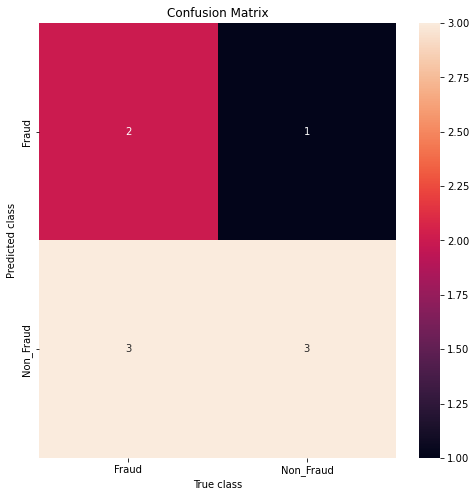

In [5]:
conf_matrix= confusion_matrix(df.True_class, df.Predicted_Class)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted class")
plt.xlabel("True class")
plt.show()

調整 threshold 為預測機率0.6

In [6]:
pred_y1 = [1 if e >= 0.6 else 0 for e in df.Predicted_Probability]

調整threshold之後的confusion matrix

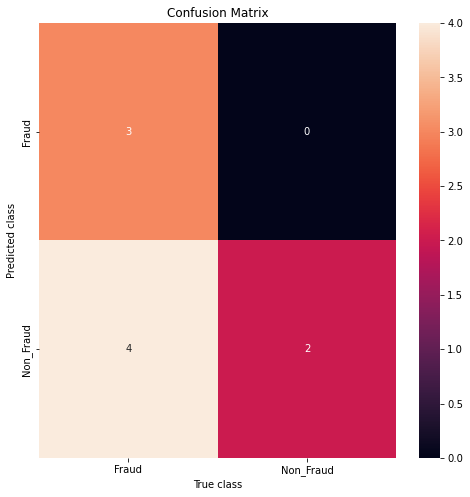

In [7]:
conf_matrix1= confusion_matrix(df.True_class, pred_y1)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix1,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted class")
plt.xlabel("True class")
plt.show()

scikit-learn套件中會自行給定threshold的值

In [8]:
false_pos_rate, true_pos_rate, threshold = roc_curve(df.True_class, df.Predicted_Class)

In [9]:
threshold

array([2, 1, 0], dtype=int64)

In [10]:
roc_df = pd.DataFrame({'FPR':false_pos_rate, 'TPR':true_pos_rate,'Threshold':threshold})
roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.0,2
1,0.333333,0.5,1
2,1.000000,1.0,0


In [11]:
roc_auc = auc(false_pos_rate, true_pos_rate) #算出AUC

In [12]:
roc_auc

0.5833333333333334

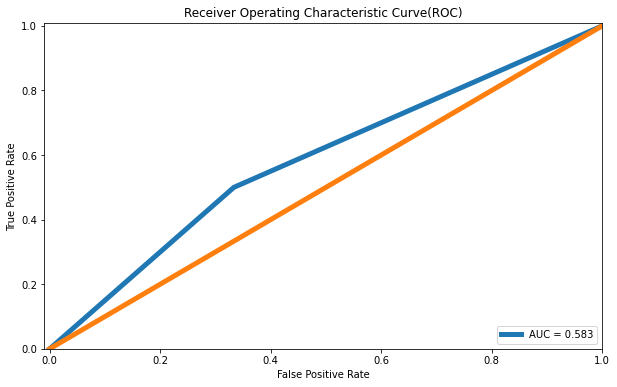

In [13]:
plt.figure(figsize=(10,6))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5,label= 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],linewidth=5)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic Curve(ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()